In [1]:
import os
import sys  
import pandas as pd
import PredictorOptimize
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
population = pd.read_csv('WorldPopulation/API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv')
p_density = pd.read_csv('WorldPopulation/API_EN.POP.DNST_DS2_en_csv_v2_887474.csv')
population_density = pd.merge(population[['Country Code','Country Name','2018']], p_density[['Country Code','2018']], on = 'Country Code')
population_density.columns = ['Country Code', 'Country Name', 'Population', 'Density']


In [3]:
population_density

,Country Code,Country Name,Population,Density
0,ABW,Aruba,1.058450e+05,588.027778
1,AFG,Afghanistan,3.717239e+07,56.937760
2,AGO,Angola,3.080976e+07,24.713052
3,ALB,Albania,2.866376e+06,104.612263
4,AND,Andorra,7.700600e+04,163.842553
5,ARB,Arab World,4.197906e+08,37.372365
6,ARE,United Arab Emirates,9.630959e+06,135.609110
7,ARG,Argentina,4.449450e+07,16.258510
8,ARM,Armenia,2.951776e+06,103.680225
9,ASM,American Samoa,5.546500e+04,277.325000


In [4]:
df['Date'].unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18'], dtype=object)

In [5]:
#%%
df_china = df[df['Country/Region'] == 'China'][['Date','Province/State','ConfirmedCases','Fatalities']]
df_china.set_index('Date', inplace=True)
df_acumed_daycases = pd.DataFrame(df_china.groupby('Date')['ConfirmedCases','Fatalities'].sum())
df_diff_daycases = pd.DataFrame(df_china.groupby(['Province/State','Date'])['ConfirmedCases','Fatalities'].sum().diff())
df_acumed_daycases.plot(grid=True),df_diff_daycases.loc['Hubei'].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x16ad8182ef0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16ad849f1d0>)

(<matplotlib.axes._subplots.AxesSubplot at 0x16ad8531c88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16ad8835128>)

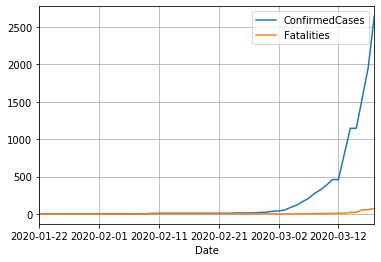

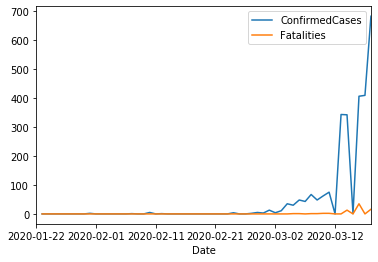

In [6]:
#%%
Country = 'United Kingdom'
df_c = df[df['Country/Region'] == Country][['Date','Province/State','ConfirmedCases','Fatalities']]
df_c.set_index('Date', inplace=True)
df_acumed_daycases = pd.DataFrame(df_c.groupby('Date')['ConfirmedCases','Fatalities'].sum())
df_diff_daycases = pd.DataFrame(df_c.groupby(['Date'])['ConfirmedCases','Fatalities'].sum().diff())
df_acumed_daycases.plot(grid=True),df_diff_daycases.plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x16ad8501978>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16ad894dc88>)

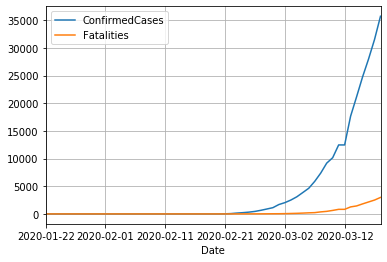

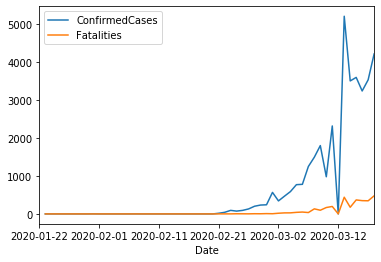

In [7]:
#%%
Country = 'Italy'
df_c = df[df['Country/Region'] == Country][['Date','Province/State','ConfirmedCases','Fatalities']]
df_c.set_index('Date', inplace=True)
df_acumed_daycases = pd.DataFrame(df_c.groupby('Date')['ConfirmedCases','Fatalities'].sum())
df_diff_daycases = pd.DataFrame(df_c.groupby(['Date'])['ConfirmedCases','Fatalities'].sum().diff())
df_acumed_daycases.plot(grid=True),df_diff_daycases.plot()

In [8]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)
def predict_n_steps_AR(data, n_steps, use_new_model = True):
    data_history = data
    for i in range(n_steps):
        model = AR(data_history)
        model_fit = model.fit(maxlag=3, disp=True)
        yhat = model_fit.predict(len(data_history), len(data_history))
        data_history = np.concatenate((data_history, yhat))        
    return data_history

In [9]:
Country = 'Italy'
df_c = df[df['Country/Region'] == Country][['Date','Province/State','ConfirmedCases','Fatalities']]
df_c.set_index('Date', inplace=True)
df_acumed_daycases = pd.DataFrame(df_c.groupby('Date')['ConfirmedCases','Fatalities'].sum())
df_diff_daycases = pd.DataFrame(df_c.groupby(['Date'])['ConfirmedCases','Fatalities'].sum().diff())
data = df_acumed_daycases['ConfirmedCases'].astype('float')
predict_n_steps_AR(data, 10, use_new_model = True)

f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.00000000e+00, 2.00000000e+00, 2.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 2.00000000e+00, 2.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 2.00000000e+01, 6.20000000e+01,
       1.55000000e+02, 2.29000000e+02, 3.22000000e+02, 4.53000000e+02,
       6.55000000e+02, 8.88000000e+02, 1.12800000e+03, 1.69400000e+03,
       2.03600000e+03, 2.50200000e+03, 3.08900000e+03, 3.85800000e+03,
       4.63600000e+03, 5.88300000e+03, 7.37500000e+03, 9.17200000e+03,
       1.01490000e+04, 1.24620000e+04, 1.24620000e+04, 1.76600000e+04,
       2.11570000e+04, 2.47470000e+04, 2.79800000e+04, 3.15060000e+04,
      

In [10]:
Country = 'United Kingdom'
df_c = df[df['Country/Region'] == Country][['Date','ConfirmedCases','Fatalities']]
df_c.set_index('Date', inplace=True)
df_acumed_daycases = pd.DataFrame(df_c.groupby('Date')['ConfirmedCases','Fatalities'].sum())
df_diff_daycases = pd.DataFrame(df_c.groupby(['Date'])['ConfirmedCases','Fatalities'].sum().diff())
data = df_acumed_daycases['ConfirmedCases'].astype('float')
predict_n_steps_AR(data, 10, use_new_model = True)

f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.00000000e+00, 2.00000000e+00, 2.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 2.00000000e+00, 2.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 8.00000000e+00,
       8.00000000e+00, 9.00000000e+00, 9.00000000e+00, 9.00000000e+00,
       9.00000000e+00, 9.00000000e+00, 9.00000000e+00, 9.00000000e+00,
       9.00000000e+00, 9.00000000e+00, 9.00000000e+00, 9.00000000e+00,
       9.00000000e+00, 1.30000000e+01, 1.30000000e+01, 1.30000000e+01,
       1.50000000e+01, 2.00000000e+01, 2.30000000e+01, 3.60000000e+01,
       4.00000000e+01, 5.10000000e+01, 8.60000000e+01, 1.16000000e+02,
       1.64000000e+02, 2.07000000e+02, 2.74000000e+02, 3.22000000e+02,
       3.84000000e+02, 4.59000000e+02, 4.59000000e+02, 8.02000000e+02,
       1.14400000e+03, 1.14500000e+03, 1.55100000e+03, 1.96000000e+03,
      

In [11]:
Country = 'China'
df_c = df[df['Country/Region'] == Country][['Date','ConfirmedCases','Fatalities']]
df_c.set_index('Date', inplace=True)
df_acumed_daycases = pd.DataFrame(df_c.groupby('Date')['ConfirmedCases','Fatalities'].sum())
df_diff_daycases = pd.DataFrame(df_c.groupby(['Date'])['ConfirmedCases','Fatalities'].sum().diff())
data = df_acumed_daycases['ConfirmedCases'].astype('float')
predict_n_steps_AR(data, 10, use_new_model = True)

f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


array([  548.        ,   643.        ,   920.        ,  1406.        ,
        2075.        ,  2877.        ,  5509.        ,  6087.        ,
        8141.        ,  9802.        , 11891.        , 16630.        ,
       19716.        , 23707.        , 27440.        , 30587.        ,
       34110.        , 36814.        , 39829.        , 42354.        ,
       44386.        , 44759.        , 59895.        , 66358.        ,
       68413.        , 70513.        , 72434.        , 74211.        ,
       74619.        , 75077.        , 75550.        , 77001.        ,
       77022.        , 77241.        , 77754.        , 78166.        ,
       78600.        , 78928.        , 79356.        , 79932.        ,
       80136.        , 80261.        , 80386.        , 80537.        ,
       80690.        , 80770.        , 80823.        , 80860.        ,
       80887.        , 80921.        , 80932.        , 80945.        ,
       80977.        , 81003.        , 81033.        , 81058.        ,
      

#Below just trial

In [32]:
# create a difference transform of the dataset

# load dataset
series = df_c.astype('float')['ConfirmedCases']
X = difference(series.values)
# fit model
model = AR(X)
model_fit = model.fit(maxlag=7, disp=False)
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
np.save('ar_data.npy', X)
# save the last ob
np.save('ar_obs.npy', [series.values[-1]])

In [34]:
print(X)

[ 8.  6. 24. ...  0.  1.  0.]


In [35]:
print(sum(X)/len(X))

0.6547872340425532


In [36]:
[series.values[-1]]

[1232.0]

In [37]:
# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[0.46987288 0.03326122 0.02385946 0.02571241 0.02546499 0.02349361
 0.01956001 0.01864234]
[1232.]


In [38]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import ARResults
import numpy
# load model
model = ARResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 1232.877516


In [39]:
df_c.astype('float')['ConfirmedCases'].tail(1)

Date
2020-03-18    1232.0
Name: ConfirmedCases, dtype: float64

In [40]:
data = df_c.astype('float')['ConfirmedCases']
predict_n_steps_AR(data, 10, use_new_model = True)

f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


array([1.00000000e+00, 9.00000000e+00, 1.50000000e+01, ...,
       1.29922685e+03, 1.30704061e+03, 1.31470055e+03])

In [41]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
data = df_c.astype('float')['ConfirmedCases']
# fit model
model = AR(data)
model_fit = model.fit(maxlag=3, disp=True)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

1881    1240.406102
dtype: float64
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [42]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = df_c.astype('float')['ConfirmedCases']
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

1881    1232.0
dtype: float64
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [43]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = df_c.astype('float')['ConfirmedCases']
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

1881    1232.0
dtype: float64
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [44]:
data

Date
2020-01-22       1.0
2020-01-23       9.0
2020-01-24      15.0
2020-01-25      39.0
2020-01-26      60.0
2020-01-27      70.0
2020-01-28     106.0
2020-01-29     152.0
2020-01-30     200.0
2020-01-31     237.0
2020-02-01     297.0
2020-02-02     340.0
2020-02-03     408.0
2020-02-04     480.0
2020-02-05     530.0
2020-02-06     591.0
2020-02-07     665.0
2020-02-08     733.0
2020-02-09     779.0
2020-02-10     830.0
2020-02-11     860.0
2020-02-12     889.0
2020-02-13     910.0
2020-02-14     934.0
2020-02-15     950.0
2020-02-16     962.0
2020-02-17     973.0
2020-02-18     982.0
2020-02-19     986.0
2020-02-20     987.0
               ...  
2020-02-18    1172.0
2020-02-19    1174.0
2020-02-20    1175.0
2020-02-21    1203.0
2020-02-22    1205.0
2020-02-23    1205.0
2020-02-24    1205.0
2020-02-25    1205.0
2020-02-26    1205.0
2020-02-27    1205.0
2020-02-28    1205.0
2020-02-29    1205.0
2020-03-01    1205.0
2020-03-02    1206.0
2020-03-03    1213.0
2020-03-04    1213.0
2020-03-

In [45]:
df_c.astype('float')['ConfirmedCases']

Date
2020-01-22       1.0
2020-01-23       9.0
2020-01-24      15.0
2020-01-25      39.0
2020-01-26      60.0
2020-01-27      70.0
2020-01-28     106.0
2020-01-29     152.0
2020-01-30     200.0
2020-01-31     237.0
2020-02-01     297.0
2020-02-02     340.0
2020-02-03     408.0
2020-02-04     480.0
2020-02-05     530.0
2020-02-06     591.0
2020-02-07     665.0
2020-02-08     733.0
2020-02-09     779.0
2020-02-10     830.0
2020-02-11     860.0
2020-02-12     889.0
2020-02-13     910.0
2020-02-14     934.0
2020-02-15     950.0
2020-02-16     962.0
2020-02-17     973.0
2020-02-18     982.0
2020-02-19     986.0
2020-02-20     987.0
               ...  
2020-02-18    1172.0
2020-02-19    1174.0
2020-02-20    1175.0
2020-02-21    1203.0
2020-02-22    1205.0
2020-02-23    1205.0
2020-02-24    1205.0
2020-02-25    1205.0
2020-02-26    1205.0
2020-02-27    1205.0
2020-02-28    1205.0
2020-02-29    1205.0
2020-03-01    1205.0
2020-03-02    1206.0
2020-03-03    1213.0
2020-03-04    1213.0
2020-03-

In [46]:
data = df_c.astype('float')['ConfirmedCases'].values
	# data split
n_test = 3
# model configs
cfg_list = PredictorOptimize.exp_smoothing_configs(seasonal=[None])
# grid search

#walk_forward_validation(data, n_test, cfg)

scores = PredictorOptimize.grid_search(data, cfg_list, n_test)
print('done')
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

> Model[['add', True, None, None, False, True]] 0.854
 > Model[['add', True, None, None, False, False]] 0.535
 > Model[['add', False, None, None, False, True]] 0.571
 > Model[['add', False, None, None, False, False]] 0.577
 > Model[[None, False, None, None, False, True]] 0.570
 > Model[[None, False, None, None, False, False]] 0.577
done
['add', True, None, None, False, False] 0.5346136662035631
[None, False, None, None, False, True] 0.5704779744889301
['add', False, None, None, False, True] 0.5706742439669452


In [47]:
data = df_c.astype('float')['ConfirmedCases'].values
	# data split
n_test = 3
# model configs
cfg_list = PredictorOptimize.exp_smoothing_configs(seasonal=[0,6])
# grid search

#walk_forward_validation(data, n_test, cfg)

scores = PredictorOptimize.grid_search(data, cfg_list, n_test)
print('done')
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

> Model[['add', True, 'add', 6, False, True]] 44.297
 > Model[['add', True, 'add', 6, False, False]] 44.449
 > Model[['add', True, None, 0, False, True]] 0.854
 > Model[['add', True, None, 0, False, False]] 0.535
 > Model[['add', True, None, 6, False, True]] 0.854
 > Model[['add', True, None, 6, False, False]] 0.535
 > Model[['add', False, 'add', 6, False, True]] 42.403
 > Model[['add', False, 'add', 6, False, False]] 42.327
 > Model[['add', False, None, 0, False, True]] 0.571
 > Model[['add', False, None, 0, False, False]] 0.577
 > Model[['add', False, None, 6, False, True]] 0.571
 > Model[['add', False, None, 6, False, False]] 0.577
 > Model[[None, False, 'add', 6, False, True]] 43.294
 > Model[[None, False, 'add', 6, False, False]] 43.546
 > Model[[None, False, None, 0, False, True]] 0.570
 > Model[[None, False, None, 0, False, False]] 0.577
 > Model[[None, False, None, 6, False, True]] 0.570
 > Model[[None, False, None, 6, False, False]] 0.577
done
['add', True, None, 0, False, Fal

In [48]:
sum(data)/len(data)

1661.1493886230728

In [49]:
PredictorOptimize.exp_smoothing_forecast(data, ['add', True, None, None, False, False])

1232.4296779155732

In [50]:
config = scores[:1][0][0]
config

"['add', True, None, 0, False, False]"

In [51]:
import ast
n_test = 3
def predict_n_steps(data, n_steps, use_new_model = True):
    data_history = data
    cfg_list = PredictorOptimize.exp_smoothing_configs(seasonal=[0,6,12])
    scores = PredictorOptimize.grid_search(data, cfg_list, n_test)
    config = scores[:1][0][0]
    if use_new_model == True:
        for i in range(n_steps):
            new = np.array([PredictorOptimize.exp_smoothing_forecast(data_history,ast.literal_eval(config))])
            data_history = np.concatenate((data_history, new))
    else:
        t,d,s,p,b,r = ast.literal_eval(config)
        model = ExponentialSmoothing(data_history, trend=t, damped=d, seasonal=s, seasonal_periods=p)
        model_fit = model.fit(optimized=True, use_boxcox=b, remove_bias=r)
        for i in range(n_steps):            
            yhat = np.array(model_fit.predict(len(data_history), len(data_history)))            
            data_history = np.concatenate((data_history, yhat))            
    return data_history

In [31]:
predict_n_steps(data,4)

> Model[['add', True, 'add', 6, False, True]] 44.297
 > Model[['add', True, 'add', 6, False, False]] 44.449
 > Model[['add', True, 'add', 12, False, True]] 44.276
 > Model[['add', True, 'add', 12, False, False]] 43.930
 > Model[['add', True, None, 0, False, True]] 0.854
 > Model[['add', True, None, 0, False, False]] 0.535
 > Model[['add', True, None, 6, False, True]] 0.854
 > Model[['add', True, None, 6, False, False]] 0.535
 > Model[['add', True, None, 12, False, True]] 0.854
 > Model[['add', True, None, 12, False, False]] 0.535
 > Model[['add', False, 'add', 6, False, True]] 42.403
 > Model[['add', False, 'add', 6, False, False]] 42.327
 > Model[['add', False, 'add', 12, False, True]] 51.518
 > Model[['add', False, 'add', 12, False, False]] 51.930
 > Model[['add', False, None, 0, False, True]] 0.571
 > Model[['add', False, None, 0, False, False]] 0.577
 > Model[['add', False, None, 6, False, True]] 0.571
 > Model[['add', False, None, 6, False, False]] 0.577
 > Model[['add', False, No

array([1.00000000e+00, 9.00000000e+00, 1.50000000e+01, ...,
       1.23280524e+03, 1.23313572e+03, 1.23342654e+03])

In [33]:
predict_n_steps(data,60,False)

> Model[['add', True, 'add', 6, False, True]] 44.297
 > Model[['add', True, 'add', 6, False, False]] 44.449
 > Model[['add', True, 'add', 12, False, True]] 44.276
 > Model[['add', True, 'add', 12, False, False]] 43.930
 > Model[['add', True, None, 0, False, True]] 0.854
 > Model[['add', True, None, 0, False, False]] 0.535
 > Model[['add', True, None, 6, False, True]] 0.854
 > Model[['add', True, None, 6, False, False]] 0.535
 > Model[['add', True, None, 12, False, True]] 0.854
 > Model[['add', True, None, 12, False, False]] 0.535
 > Model[['add', False, 'add', 6, False, True]] 42.403
 > Model[['add', False, 'add', 6, False, False]] 42.327
 > Model[['add', False, 'add', 12, False, True]] 51.518
 > Model[['add', False, 'add', 12, False, False]] 51.930
 > Model[['add', False, None, 0, False, True]] 0.571
 > Model[['add', False, None, 0, False, False]] 0.577
 > Model[['add', False, None, 6, False, True]] 0.571
 > Model[['add', False, None, 6, False, False]] 0.577
 > Model[['add', False, No

array([1.00000000e+00, 9.00000000e+00, 1.50000000e+01, ...,
       1.23555667e+03, 1.23555693e+03, 1.23555715e+03])